# Data source #1
We have setup a **linux server** in AWS for this project.  http://my-cunymsds.com/data602 We have stored the .CSV file with life expectancy on thr server, so you can easily download it as well. here http://my-cunymsds.com/data602/Life_Expectancy_Data.csv 

The source is WHO (World Health Organization) and is a widely available dataset. You can also donwload from **Kaggle** at https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who



# Data Source #2
As a second source we will use the Car Prices Dataset from Kaggle. https://www.kaggle.com/code/dronax/car-prices-dataset



# Libraries

I believe I will use:

1. Pandas
2. Numpy
3. Matplotlib
4. Seaborn
5. Scikit-Learn

In [49]:
#Libraries to use

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


# Exploratory Data Analysis #1

In [51]:
df = pd.read_csv('http://www.my-cunymsds.com/data622/Life_Expectancy_Data2.csv')

### Let's see the first few records and a few attributes of the dataset


In [52]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Region
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,Asia
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,Asia
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,Asia
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,Asia
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,Asia


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

#### The dataset has almost 3,000 rows and 22 columns, all of them features which the people who put together the dataset  thought were important to help determine or explain **life expectancy**. Let's see some general stats of the data

In [54]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2522.000000,2.318000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,8097.543023,3.374295e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,15055.261935,1.596350e+08,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,482.724583,2.243710e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1925.714195,1.514464e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,6566.427379,8.448591e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.898711e+09,27.700000,28.600000,0.948000,20.700000


### The most important I see is that we will need to do some normalization of the predictors when we create our regression model.  The scale of the features varies considerable, thus models perform better if features are normalized.

### Let's check for missing values

In [55]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                416
Population                         620
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
Region                               0
dtype: int64

### There are plenty missing values, we will have do some imputation (instead of just deleted rows). I believe we can impute values using the mean, meadian of the columns, or even try to do KNN to get "good" values for the missing data.

### Let's run some corelation plots and tables to check what the data tells us.

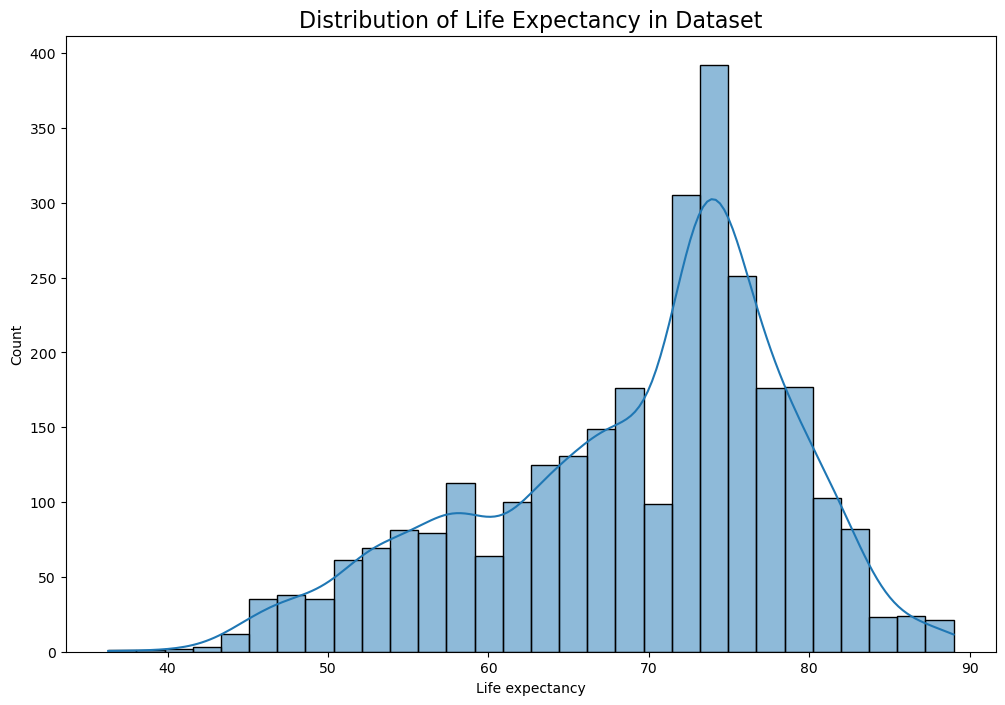

In [56]:
plt.figure(figsize=(12,8))
sns.histplot(df["Life expectancy"].dropna(), kde=True)

plt.title("Distribution of Life Expectancy in Dataset", fontsize=16,color="black")
plt.show()

### sns.pairplot is pretty powerfull method, but since we have almost two dozen features the scale makes it difficult to be useful.

### Let's try a tabular corelation matrix

In [57]:
df.corr()

C:\Users\jrfal\AppData\Local\Temp\ipykernel_7960\1134722465.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.170033,-0.079052,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.092912,0.003562,-0.047876,-0.050929,0.243468,0.209400
Life expectancy,0.170033,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,-0.222529,0.465556,0.218086,0.479495,-0.556556,0.468887,0.014932,-0.477183,-0.471584,0.724776,0.751975
Adult Mortality,-0.079052,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,0.094146,-0.274823,-0.115281,-0.275131,0.523821,-0.307175,-0.058850,0.302904,0.308457,-0.457626,-0.454612
infant deaths,-0.037415,-0.196557,0.078756,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.102637,0.763157,0.465711,0.471350,-0.145139,-0.193720
Alcohol,-0.052990,0.404877,-0.195848,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.377901,-0.032353,-0.428795,-0.417414,0.450040,0.547378
percentage expenditure,0.031400,0.381864,-0.242860,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.829571,-0.056096,-0.251369,-0.252905,0.381952,0.389687
Hepatitis B,0.104333,0.256762,-0.162476,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.079305,-0.086789,-0.120429,-0.124960,0.199549,0.231117
Measles,-0.082493,-0.157586,0.031176,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.075352,0.575805,0.224808,0.221072,-0.129568,-0.137225
BMI,0.108974,0.567694,-0.387017,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.314868,-0.113327,-0.532025,-0.538911,0.508774,0.546961
under-five deaths,-0.042937,-0.222529,0.094146,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.107040,0.734496,0.467789,0.472263,-0.163305,-0.209373


### We can see that some variables have a strong corelation (postive or negative) to life expectancy. For example: BMI, HIV/AIDS, Income, Schooling and Adult Mortality have corelation >0.50 which makes them strong candidates to be good predictors of our prediction model.

### Let's try sns.heatmap to visualize our correlation in a simple way

C:\Users\jrfal\AppData\Local\Temp\ipykernel_7960\2069137882.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

C:\Users\jrfal\AppData\Local\Temp\ipykernel_7960\2069137882.py:7: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

C:\Users\jrfal\AppData\Local\Temp\ipykernel_7960\2069137882.py:8: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

C:\Users\jrfal\AppData\Local\Temp\ipykernel_7960\2069137882.py:9: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecat

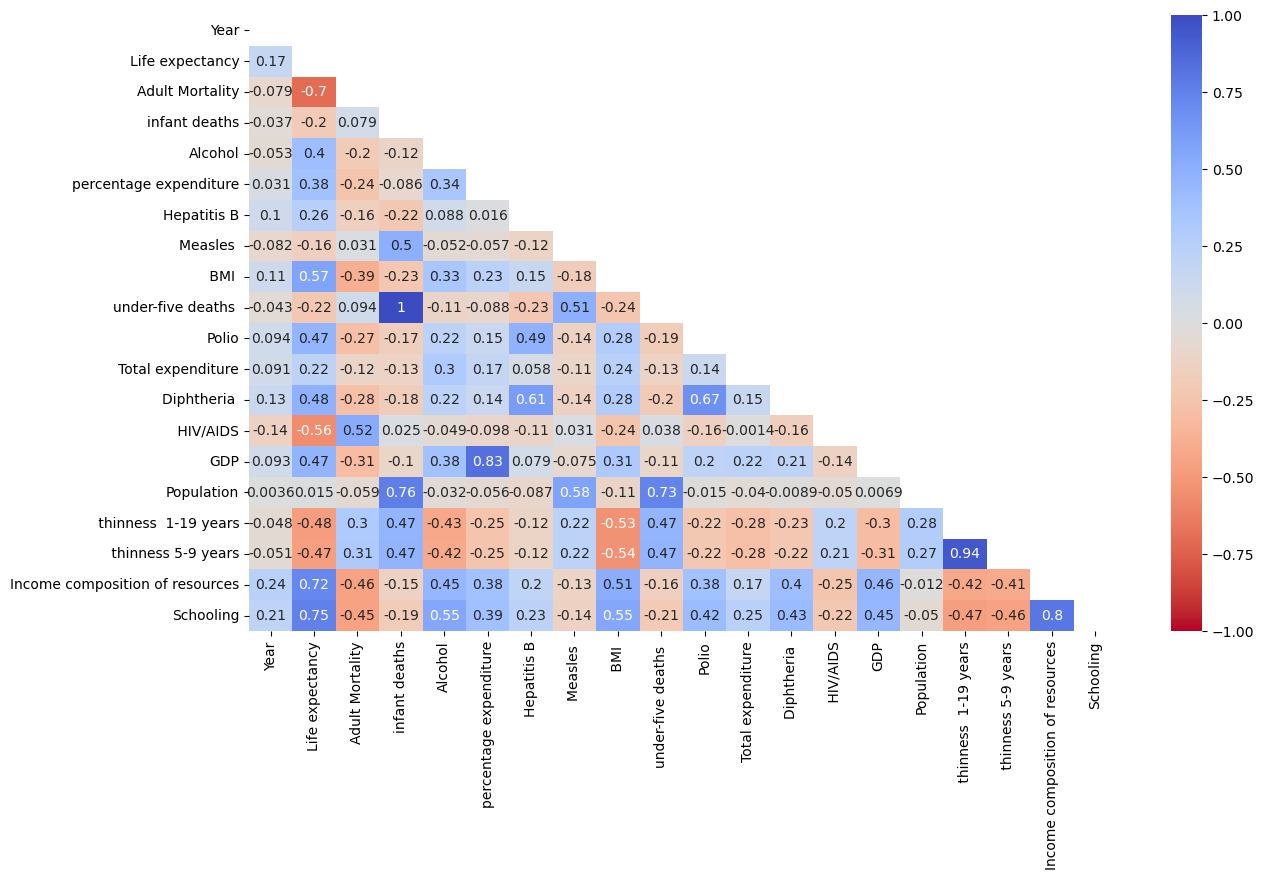

In [58]:
# plot the heatmap
# Generate a mask for the upper triangle
corr = pd.DataFrame(df.corr()) 
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(14,8))
sns.heatmap(df.corr(), 
        xticklabels=df.corr().columns,
        yticklabels=df.corr().columns,
           cmap="coolwarm_r",center=0.0,annot=True, fmt='.2g',mask=mask, vmin=-1, vmax=1)
plt.show()

In [59]:
df_temp2 = df.copy(deep=True)

df_temp2['GDP'] = df.groupby(['Country'], sort=False)['GDP'].apply(lambda x: x.fillna(x.mean()))
df_temp2['Population'] = df.groupby(['Country'], sort=False)['Population'].apply(lambda x: x.fillna(x.mean()))


C:\Users\jrfal\AppData\Local\Temp\ipykernel_7960\2566685446.py:3: FutureWarning:

Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)

C:\Users\jrfal\AppData\Local\Temp\ipykernel_7960\2566685446.py:4: FutureWarning:

Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)



In [60]:
df_temp2.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                373
Population                         616
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
Region                               0
dtype: int64

In [61]:
df_country.sort_values(by="Population", ascending=False)

,Country,Region,GDP,Life expectancy,Population
28,China,Asia,2345.303158,74.262500,1.322347e+09
60,India,Asia,837.920051,65.418750,1.317131e+09
141,United States of America,America,59939.000000,78.062500,3.310000e+08
61,Indonesia,Asia,3748.207068,67.556250,2.223561e+08
97,Nigeria,Africa,2129.870765,51.356250,2.061390e+08
...,...,...,...,...,...
64,Israel,Asia,18860.476016,81.300000,2.786288e+04
132,Tonga,Oceania,1981.555186,72.531250,2.658981e+04
121,Sri Lanka,Asia,1040.110190,73.400000,1.084481e+04
48,Georgia,Asia,2051.189653,73.446667,8.351133e+03


In [62]:
df_country.isna().sum()

Country            0
Region             0
GDP                0
Life expectancy    0
Population         0
dtype: int64

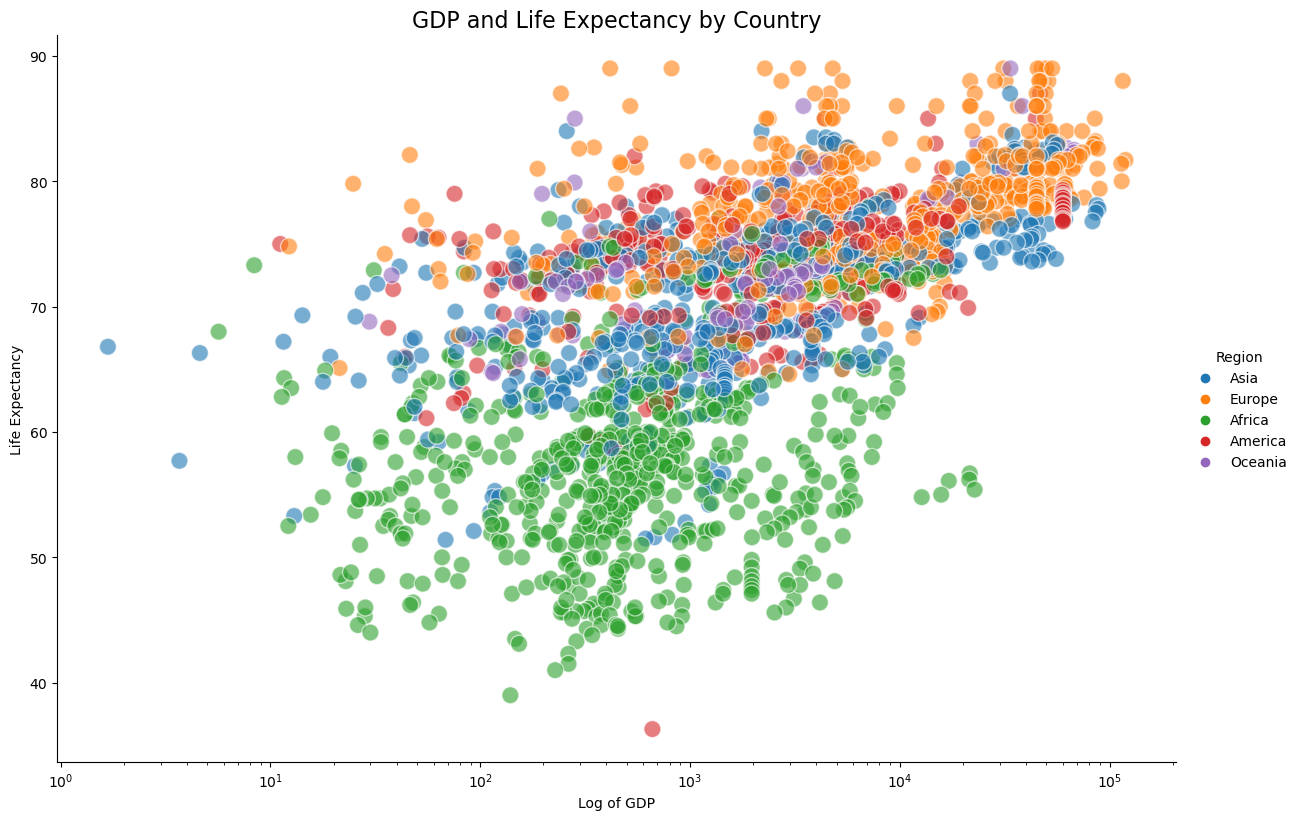

In [63]:
g = sns.relplot(x= df["GDP"],y=df["Life expectancy"],s=150,height=8,
                aspect=1.5, alpha=0.6, hue=df["Region"])

plt.xscale("log")
#plt.yscale("log")

plt.title(label='GDP and Life Expectancy by Country',fontsize=16,color="black")

plt.xlabel('Log of GDP')
plt.ylabel('Life Expectancy')

plt.show()

# Exploratory Data Analysis #2

In [64]:
df_cars = pd.read_csv('http://www.my-cunymsds.com/data622/car_prices.csv')

In [65]:
df_cars.head()

,make,model,year,mileage,price,color,state,date
0,Chevrolet,Cruze,2011,99157,37488,white,TX,2023-09-26 23:02:01.647970
1,Toyota,Cruze,2017,19882,34176,red,IL,2023-08-08 23:02:01.648413
2,Chevrolet,Altima,2011,77718,40297,blue,CA,2023-02-25 23:02:01.648422
3,Nissan,Fusion,2012,83613,43492,silver,TX,2023-04-25 23:02:01.648425
4,Ford,Cruze,2016,95349,26655,red,NY,2023-12-14 23:02:01.648426


In [66]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   make     10000 non-null  object
 1   model    10000 non-null  object
 2   year     10000 non-null  int64 
 3   mileage  10000 non-null  int64 
 4   price    10000 non-null  int64 
 5   color    10000 non-null  object
 6   state    10000 non-null  object
 7   date     10000 non-null  object
dtypes: int64(3), object(5)
memory usage: 625.1+ KB


In [67]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2522.000000,2.318000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,8097.543023,3.374295e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,15055.261935,1.596350e+08,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,482.724583,2.243710e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1925.714195,1.514464e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,6566.427379,8.448591e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.898711e+09,27.700000,28.600000,0.948000,20.700000


In [68]:
df_cars.isna().sum()

make       0
model      0
year       0
mileage    0
price      0
color      0
state      0
date       0
dtype: int64

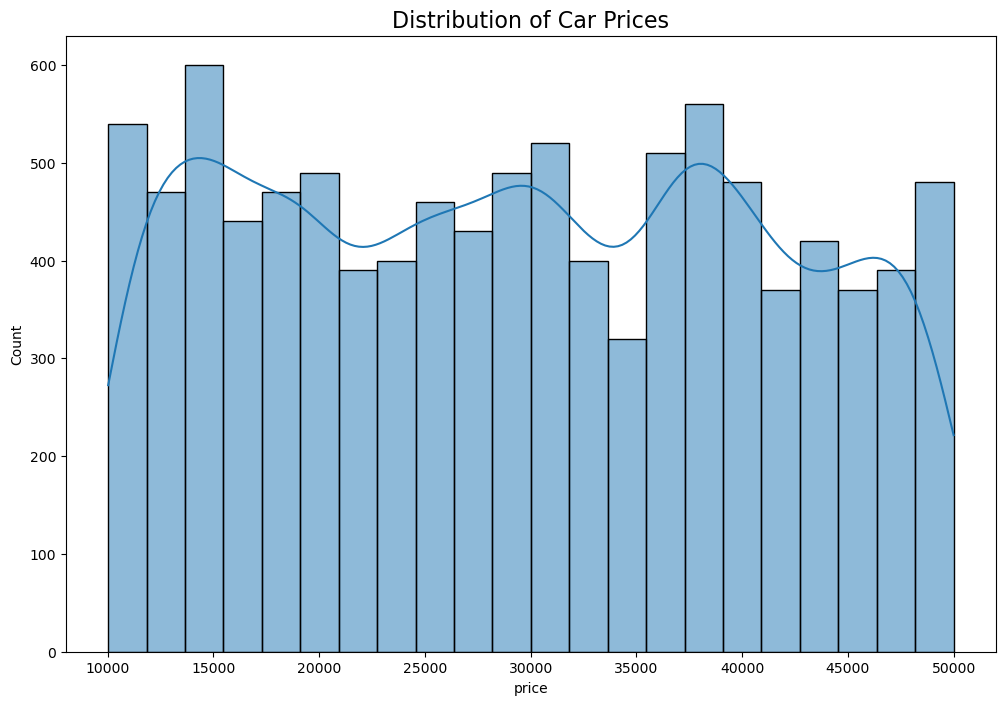

In [69]:
plt.figure(figsize=(12,8))
sns.histplot(df_cars["price"].dropna(), kde=True)

plt.title("Distribution of Car Prices", fontsize=16,color="black")
plt.show()

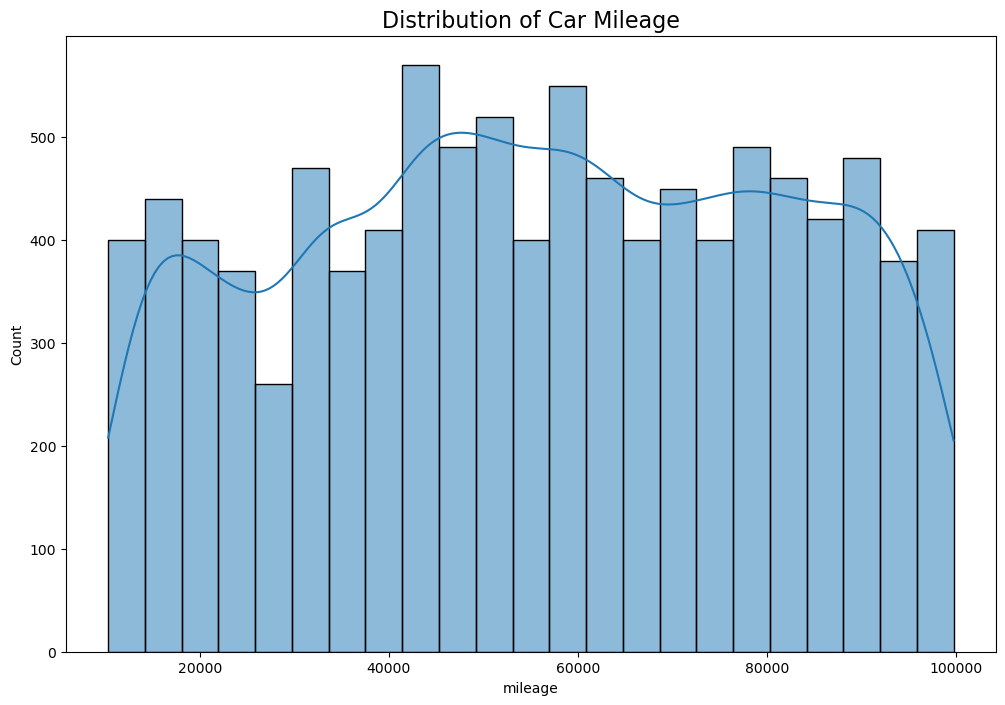

In [70]:
plt.figure(figsize=(12,8))
sns.histplot(df_cars["mileage"].dropna(), kde=True)

plt.title("Distribution of Car Mileage", fontsize=16,color="black")
plt.show()

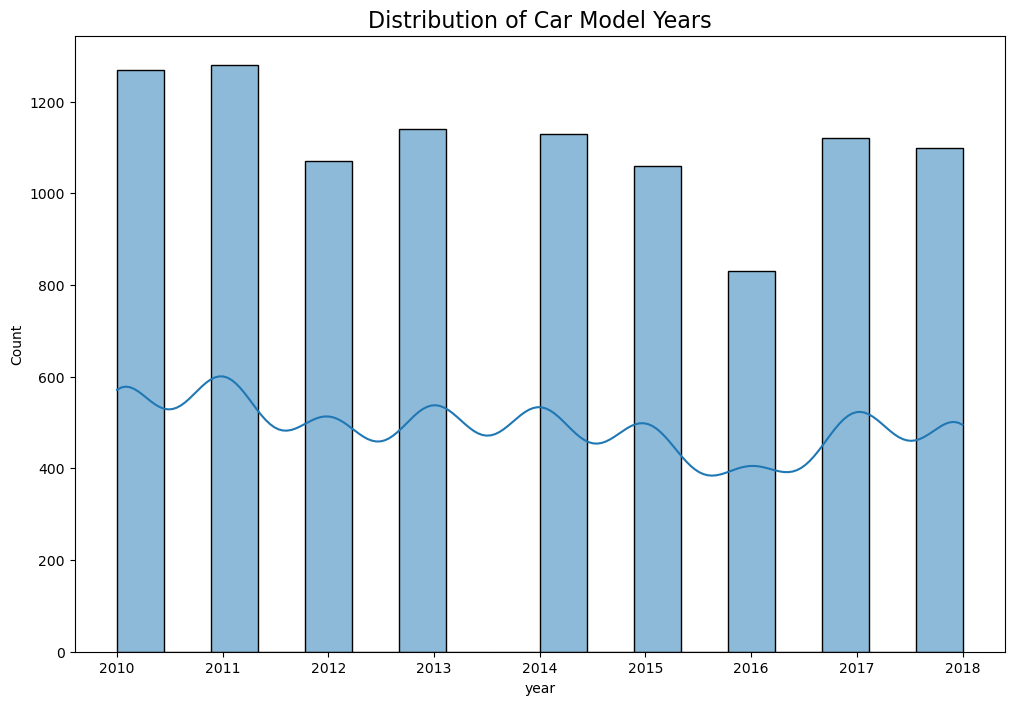

In [71]:
plt.figure(figsize=(12,8))
sns.histplot(df_cars["year"].dropna(), kde=True)

plt.title("Distribution of Car Model Years", fontsize=16,color="black")
plt.show()

In [72]:
df_cars.corr()

C:\Users\jrfal\AppData\Local\Temp\ipykernel_7960\2491154568.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,year,mileage,price
year,1.000000,0.031308,-0.028390
mileage,0.031308,1.000000,0.035534
price,-0.028390,0.035534,1.000000


In [73]:
df_cars.groupby(['make'])['model'].count()

make
Chevrolet    2090
Ford         1870
Honda        1740
Nissan       2240
Toyota       2060
Name: model, dtype: int64

In [74]:
df_cars.groupby(['state'])['model'].count()

state
CA    2140
FL    2030
IL    1750
NY    2000
TX    2080
Name: model, dtype: int64

In [75]:
#######################################################################################################################

# Machine Learning #1

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

from numpy import vectorize
from sklearn.inspection import permutation_importance


In [32]:
# We will drop rows where Life Expectancy is NAN
rs = 42
df = df[df['Life expectancy'].notna()]

X = df.drop(["Life expectancy","Country"], axis=1)

y = df["Life expectancy"]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=rs)

In [34]:
# Initialze the estimators
reg1 = LinearRegression()
reg2 = LGBMRegressor()
reg3 = XGBRegressor()
reg4 = ElasticNet()
reg5 = SVR()
reg6 = Ridge()
reg7 = Lasso()
reg8 = RandomForestRegressor()

imp1 = KNNImputer(weights="uniform")
neighbors = [20,50]

In [35]:
param1 = {}
param1['regressor'] = [reg1]
param1['imputer__n_neighbors'] = neighbors

param2 = {}
param2['regressor'] = [reg2]
param2['regressor__num_leaves'] = [50,100]
param2['regressor__max_depth'] = [20,40]
param2['regressor__learning_rate'] = [0.01,0.1]
param2['regressor__n_estimators'] = [1000,1500]
param2['imputer__n_neighbors'] =  neighbors

param3 = {}
param3['regressor'] = [reg3]
param3['regressor__n_estimators'] = [1000,1500]
param3['regressor__max_depth'] = [20,40,75]
param3['imputer__n_neighbors'] =  neighbors

param4 = {}
param4['regressor'] = [reg4]
param4['regressor__alpha'] = [0.01, 0.1]
param4['imputer__n_neighbors'] =  neighbors

param5 = {}
param5['regressor'] = [reg5]
param5['regressor__C'] = [0.01, 0.1]
param5['imputer__n_neighbors'] =  neighbors

param6 = {}
param6['regressor'] = [reg6]
param6['regressor__alpha'] = [0.01, 0.1]
param6['imputer__n_neighbors'] =  neighbors

param7 = {}
param7['regressor'] = [reg7]
param7['regressor__alpha'] = [0.01, 0.1]
param7['imputer__n_neighbors'] =  neighbors

param8 = {}
param8['regressor'] = [reg8]
param8['regressor__n_estimators'] = [500,1000]
param8['regressor__max_depth'] = [20,40]
param8['imputer__n_neighbors'] =  neighbors


params = [param1, param2, param3, param4, param6, param7, param8]
params

[{'regressor': [LinearRegression()], 'imputer__n_neighbors': [20, 50]},
 {'regressor': [LGBMRegressor()],
  'regressor__num_leaves': [50, 100],
  'regressor__max_depth': [20, 40],
  'regressor__learning_rate': [0.01, 0.1],
  'regressor__n_estimators': [1000, 1500],
  'imputer__n_neighbors': [20, 50]},
 {'regressor': [XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
                colsample_bynode=None, colsample_bytree=None,
                enable_categorical=False, gamma=None, gpu_id=None,
                importance_type=None, interaction_constraints=None,
                learning_rate=None, max_delta_step=None, max_depth=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_jobs=None, num_parallel_tree=None,
                predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
                scale_pos_weight=None, subsample=None, tree_method=None,
                validate_parameters=

In [36]:
# Pre-processor for Categotical data
categorical_preprocessor = Pipeline(steps=[("onehot", OneHotEncoder(handle_unknown="ignore",sparse=False))])

cat_transformer = ColumnTransformer([("categorical", categorical_preprocessor, ["Status","Region"])],remainder='passthrough')

In [37]:
# Define Pipeline
pipeline = Pipeline([('categorical',cat_transformer),
                     ('imputer',imp1),  
                     ('filter', VarianceThreshold(threshold=0.01)),
                     ('scaler', StandardScaler()), 
                     ('regressor', reg1)])

In [39]:
%%time

grid = GridSearchCV(pipeline, params, scoring='r2', n_jobs= -1, cv=5, verbose=4, return_train_score=True)
grid.fit(X_train, y_train)

print(grid.best_params_) 

Fitting 5 folds for each of 66 candidates, totalling 330 fits
{'imputer__n_neighbors': 50, 'regressor': LGBMRegressor(learning_rate=0.01, max_depth=40, n_estimators=1500,
              num_leaves=100), 'regressor__learning_rate': 0.01, 'regressor__max_depth': 40, 'regressor__n_estimators': 1500, 'regressor__num_leaves': 100}
CPU times: total: 52.2 s
Wall time: 6min 37s


In [40]:
####################################################################################################
#
#      Review Results
#
####################################################################################################

In [41]:
print(grid.best_score_)

0.9613168240889992


In [42]:
grid_predictions = grid.predict(X_test) 

In [43]:
print('Mean Absolute Error:', mean_absolute_error(y_test, grid_predictions))  
print('Mean Squared Error:', mean_squared_error(y_test, grid_predictions))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, grid_predictions)))

print('R squared:', r2_score(y_test, grid_predictions))


Mean Absolute Error: 1.047361921791396
Mean Squared Error: 2.725422161654985
Root Mean Squared Error: 1.6508852660481845
R squared: 0.9684920116385556


In [44]:
df_preds = pd.DataFrame({'Actual': y_test, 'Predicted': grid_predictions})
df_preds.head()

,Actual,Predicted
2399,56.5,55.873041
196,73.0,69.199728
2316,82.5,82.523552
1735,75.6,76.091292
1102,53.0,53.653047


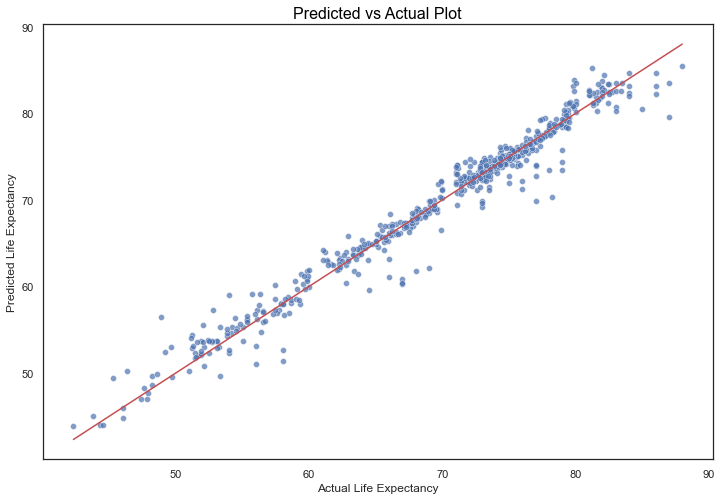

In [79]:
frompoint = min(min(y_test), min(grid_predictions))
topoint = max(max(y_test), max(grid_predictions))
diagonal = np.linspace(frompoint, topoint, 100)

fig, ax = plt.subplots(figsize=(12, 8))
p1=sns.scatterplot(x=y_test, y=grid_predictions, ax=ax,alpha=0.7)
p2=sns.lineplot(x=diagonal, y=diagonal,color='r', ax=ax)
#plt.plot(diagonal,diagonal, color="r")

plt.title(label="Predicted vs Actual Plot",fontsize=16,color="black")
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')

plt.show()

In [48]:
grid.best_estimator_.steps[4][1]

LGBMRegressor(learning_rate=0.01, max_depth=40, n_estimators=1500,
              num_leaves=100)

In [49]:
df_temp = df.drop(["Life expectancy","Country"], axis=1)

colnames = list(pd.get_dummies(df_temp).columns)
colnames

['Year',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles',
 'BMI',
 'under-five deaths',
 'Polio',
 'Total expenditure',
 'Diphtheria',
 'HIV/AIDS',
 'GDP',
 'Population',
 'thinness  1-19 years',
 'thinness 5-9 years',
 'Income composition of resources',
 'Schooling',
 'Status_Developed',
 'Status_Developing',
 'Region_Africa',
 'Region_America',
 'Region_Asia',
 'Region_Europe',
 'Region_Oceania']

In [50]:
# rotate because onehote encoder changed order and puts the Hotencoded at the BEGINNING! Which in our case are Status and Region
colnames = colnames[19:] + colnames[:19]
colnames

['Status_Developed',
 'Status_Developing',
 'Region_Africa',
 'Region_America',
 'Region_Asia',
 'Region_Europe',
 'Region_Oceania',
 'Year',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles',
 'BMI',
 'under-five deaths',
 'Polio',
 'Total expenditure',
 'Diphtheria',
 'HIV/AIDS',
 'GDP',
 'Population',
 'thinness  1-19 years',
 'thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

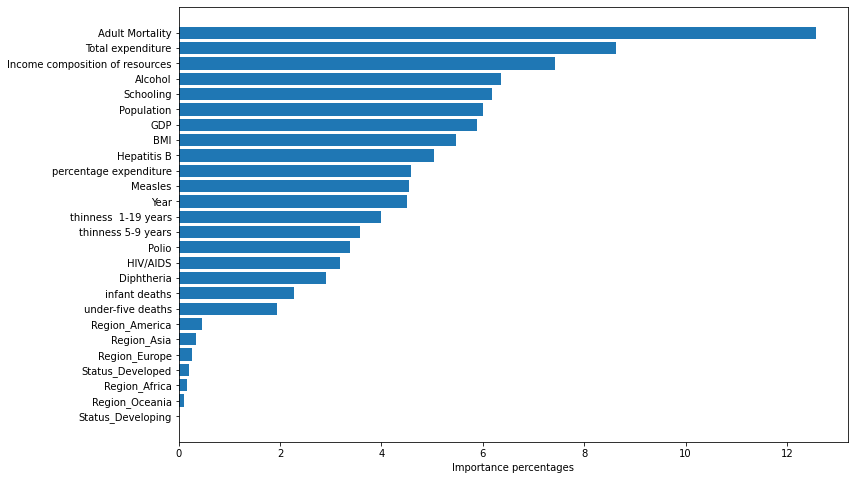

In [51]:
# Another test

feature_importances = (grid.best_estimator_.named_steps["regressor"].feature_importances_ / sum(grid.best_estimator_.named_steps["regressor"].feature_importances_)) * 100

results = pd.DataFrame({'Features': colnames,
                        'Importances': feature_importances})
results.sort_values(by='Importances', inplace=True)

plt.figure(figsize=(12,8))
ax = plt.barh(results['Features'], results['Importances'])
plt.xlabel('Importance percentages')
plt.show()

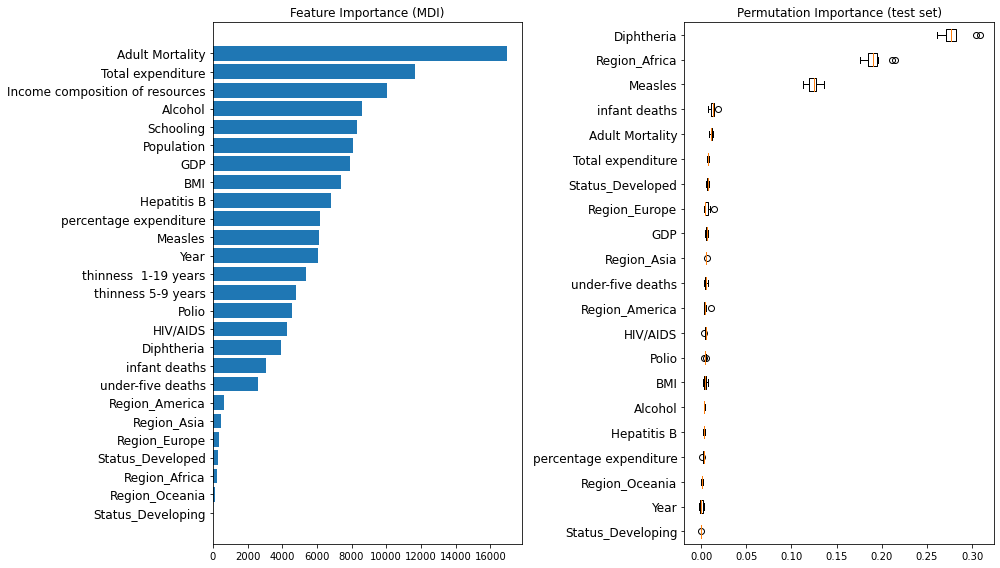

In [52]:
feature_importance = grid.best_estimator_.steps[4][1].feature_importances_
sorted_idx = np.argsort(feature_importance)

#colnames = list(pd.get_dummies(X_train).columns)
#Rotate Brand to fron to match new order of columns by ColumnTransformer
#colnames = colnames[31:] + colnames[:31]

pos = np.arange(sorted_idx.shape[0]) + 0
fig = plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(colnames)[sorted_idx], fontsize=12)
plt.title("Feature Importance (MDI)")

result = permutation_importance(grid, X_test, y_test, n_repeats=10, random_state=rs, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(colnames)[sorted_idx])
plt.yticks(fontsize=12)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

# Machine Learning #2

In [76]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   make     10000 non-null  object
 1   model    10000 non-null  object
 2   year     10000 non-null  int64 
 3   mileage  10000 non-null  int64 
 4   price    10000 non-null  int64 
 5   color    10000 non-null  object
 6   state    10000 non-null  object
 7   date     10000 non-null  object
dtypes: int64(3), object(5)
memory usage: 625.1+ KB


In [77]:
rs = 42
# We will drop the objetive variable PRICE plus DATE from the predictors

X = df_cars.drop(["price","date"], axis=1)

y = df_cars["price"]

In [78]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=rs)

In [79]:
# Initialze the estimators
reg1 = LinearRegression()
reg2 = LGBMRegressor()
reg3 = XGBRegressor()
reg4 = ElasticNet()
reg5 = SVR()
reg6 = Ridge()
reg7 = Lasso()
reg8 = RandomForestRegressor()

imp1 = KNNImputer(weights="uniform")
neighbors = [20,50]

In [80]:
param1 = {}
param1['regressor'] = [reg1]
param1['imputer__n_neighbors'] = neighbors

param2 = {}
param2['regressor'] = [reg2]
param2['regressor__num_leaves'] = [50,100]
param2['regressor__max_depth'] = [20,40]
param2['regressor__learning_rate'] = [0.01,0.1]
param2['regressor__n_estimators'] = [1000,1500]
param2['imputer__n_neighbors'] =  neighbors

param3 = {}
param3['regressor'] = [reg3]
param3['regressor__n_estimators'] = [1000,1500]
param3['regressor__max_depth'] = [20,40,75]
param3['imputer__n_neighbors'] =  neighbors

param4 = {}
param4['regressor'] = [reg4]
param4['regressor__alpha'] = [0.01, 0.1]
param4['imputer__n_neighbors'] =  neighbors

param5 = {}
param5['regressor'] = [reg5]
param5['regressor__C'] = [0.01, 0.1]
param5['imputer__n_neighbors'] =  neighbors

param6 = {}
param6['regressor'] = [reg6]
param6['regressor__alpha'] = [0.01, 0.1]
param6['imputer__n_neighbors'] =  neighbors

param7 = {}
param7['regressor'] = [reg7]
param7['regressor__alpha'] = [0.01, 0.1]
param7['imputer__n_neighbors'] =  neighbors

param8 = {}
param8['regressor'] = [reg8]
param8['regressor__n_estimators'] = [500,1000]
param8['regressor__max_depth'] = [20,40]
param8['imputer__n_neighbors'] =  neighbors


params = [param1, param2, param3, param4, param6, param7, param8]
params

[{'regressor': [LinearRegression()], 'imputer__n_neighbors': [20, 50]},
 {'regressor': [LGBMRegressor()],
  'regressor__num_leaves': [50, 100],
  'regressor__max_depth': [20, 40],
  'regressor__learning_rate': [0.01, 0.1],
  'regressor__n_estimators': [1000, 1500],
  'imputer__n_neighbors': [20, 50]},
 {'regressor': [XGBRegressor(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_j

In [41]:
# Pre-processor for Categotical data
categorical_preprocessor = Pipeline(steps=[("onehot", OneHotEncoder(handle_unknown="ignore",sparse=False))])

cat_transformer = ColumnTransformer([("categorical", categorical_preprocessor, ["make","model", "color","state"])],remainder='passthrough')

In [42]:
pipeline = Pipeline([('categorical',cat_transformer),
                     ('imputer',imp1),  
                     ('filter', VarianceThreshold(threshold=0.01)),
                     ('scaler', StandardScaler()), 
                     ('regressor', reg1)])

In [43]:
%%time

grid = GridSearchCV(pipeline, params, scoring='r2', n_jobs= -1, cv=5, verbose=4, return_train_score=True)
grid.fit(X_train, y_train)

print(grid.best_params_) 

Fitting 5 folds for each of 66 candidates, totalling 330 fits


D:\ComputerCode\JF_Environments\deeplearning-env\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



{'imputer__n_neighbors': 20, 'regressor': XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=40, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...), 'regressor__max_depth': 40, 'regressor__n_estimators': 1000}
CPU times: total: 2min 42s
Wall time: 8min 55s


In [44]:
print(grid.best_score_)

0.9999999999999343


In [45]:
grid_predictions = grid.predict(X_test) 

In [46]:
print('Mean Absolute Error:', mean_absolute_error(y_test, grid_predictions))  
print('Mean Squared Error:', mean_squared_error(y_test, grid_predictions))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, grid_predictions)))

print('R squared:', r2_score(y_test, grid_predictions))


Mean Absolute Error: 0.00232373046875
Mean Squared Error: 8.023738861083985e-06
Root Mean Squared Error: 0.0028326204936567102
R squared: 0.999999999999938


In [47]:
df_preds = pd.DataFrame({'Actual': y_test, 'Predicted': grid_predictions})
df_preds.head()

,Actual,Predicted
6252,15820,15819.999023
4684,10539,10539.000000
1731,10247,10247.000000
4742,25712,25711.998047
4521,22564,22564.000000


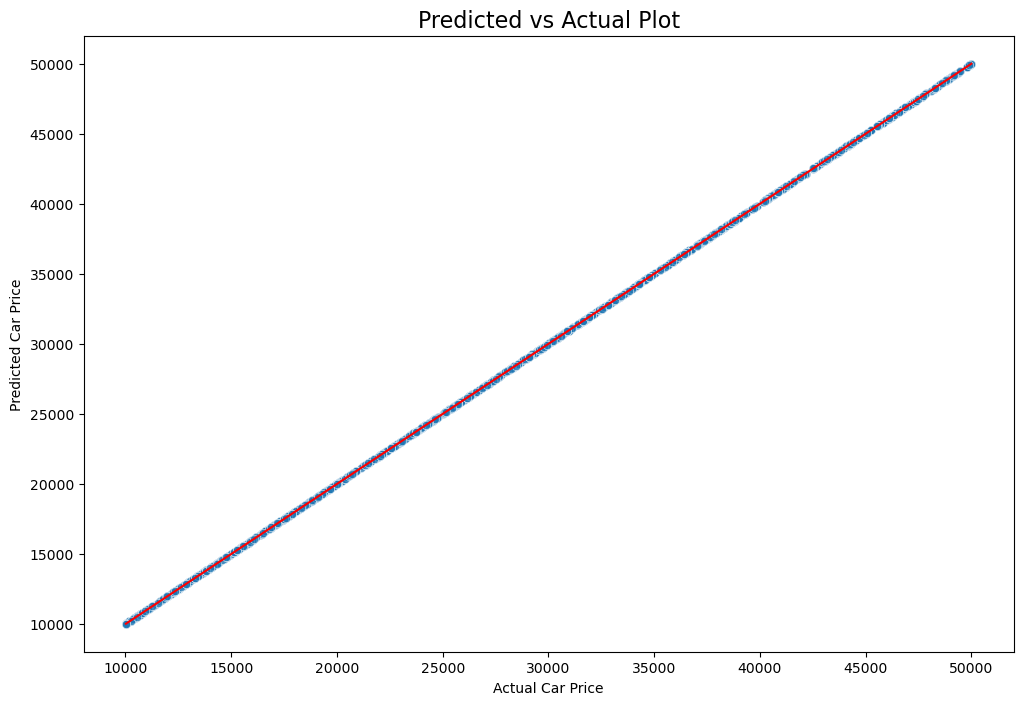

In [48]:
frompoint = min(min(y_test), min(grid_predictions))
topoint = max(max(y_test), max(grid_predictions))
diagonal = np.linspace(frompoint, topoint, 100)

fig, ax = plt.subplots(figsize=(12, 8))
p1=sns.scatterplot(x=y_test, y=grid_predictions, ax=ax,alpha=0.7)
p2=sns.lineplot(x=diagonal, y=diagonal,color='r', ax=ax)
#plt.plot(diagonal,diagonal, color="r")

plt.title(label="Predicted vs Actual Plot",fontsize=16,color="black")
plt.xlabel('Actual Car Price')
plt.ylabel('Predicted Car Price')

plt.show()